# Preliminary Library Import

In [200]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


# Business Problem Understanding

## Context

Marketing campaign are used not only by banks but also, other companies, marketing campaign is the process in which a company or institution promotes a product to its potential customers and current customers. In this dataset, a bank is using a marketing campaign to promote customers to deposit into their accounts whether they are prospective customer or customer that already had an account in the bank.

The effectiveness of the marketing campaign itself is measured by the revenue produced during the campaign whether it is short-term and long term, and how much cost of gaining customers are lowered by the campaign itself. 

This marketing campaign itself are done by contacting the customers of the bank whether they call their cellular number or the home telephone. To succeed in persuading the customer usually, more than one call to the same customer is needed.



## Problem Statement

The main problem for this dataset is how to increase the success of the marketing campaign, and thus increase the revenue generated from the product which in this case is the deposit.

Since the success of this marketing campaign depends on the customer depositing in the bank itself, it is important to first, know the important features that leads the customer depositing in the bank but also, predict which customer will deposit in the bank, and thus, we can concentrate on the marketing campaign on those customers who are likely to deposit in the bank

## Goals

So, based on the problem presented, the bank needs a tool to predict whether the prospective customer will deposit during marketing campaign or not. The features that is contained in the dataset, such as, the customer information, the marketing campaign effect on the customer deposit.

Thus, with the machine learning model, we can both predict the prospective customer willingness to deposit based on the marketing campaign, we can also analyze the features to see what each features effect on the customer decision. This two things can lead to the bank increased revenue from more deposit and customer deposit prediction can help the bank know which customer should be focused on.

## Analytic Approach

We will analyze the data to see which features in this dataset contributes to the customer depositing money in the bank or not on this marketing campaign for the bank. In this dataset, we will build a classification model, since we are making a predictive model to predict whether the customer will deposit or not so that, we can use the model to predict which customer will be deposit during the future marketing campaign and thus, we can direct more attention on to that customer. 

Feature importances could also be analyzed after the model is created so that, we could know which features can contribute to the customer depositing to the bank or not.

## Metrics Evaluation

Since the model that is used in this case is classification model, we will use ROC-AUC score and graph to see whether or not the model can predict the data better than guessing and the target class prediction can discriminate between the positive and negative class.

We will also use the accuracy of the classification model to see whether the model is accurate or not in predicting the data. So, in this model we will use the classification report function so that, we can see the overall performance of the model itself, but we will focus on the accuracy value which is the rate of which the model correctly predicting compared to the test data.

Confusion Matrix will also be used to see how the model perform by seeing how much is the model correctly predict positive and negative class and also How much does the model incorrrectly predicted

# Data Loading

In [201]:
df = pd.read_csv('data_bank_marketing_campaign.csv')
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


# Data Understanding

- The dataset contains the information about the customer of the bank and the outcome of the bank marketing campaign
- Each row contains the data of each of the customers of the bank and whether they deposit money to the bank or not

|Feature|Data Type|Description|
| --- | --- | --- |
| Age | int64 | The age of the Customer |
| Job| Object | The type of job of the customer |
| Balance | int64 | The current balance of the customer's bank account |
| Housing | Object | Whether the customer currently have a housing or not |
| Loan | Object | Whether the customer currently loaning or not |
| Contact | Integer | How the customer is contacted by the bank |
| Month | Object | The month of the last contact with the customer |
| Campaign | int64 | Number of times the customer is contacted during the campaign |
| pdays | int64 | The number of days since the customer was last contacted |
| poutcome | Integer | The outcome of the previous marketing campaign |
| Deposit | Object | Whether the customer deposit or not |

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


from the number above, there are 7813 rows or observations and 11 columns

In [203]:
df_num = df.select_dtypes('number')
df_num.describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


In [204]:
listItem = []
iqr = 0

for col in df_num.columns:
    iqr = df_num[col].quantile(0.75) - df_num[col].quantile(0.25)
    listItem.append([iqr, df_num[col].quantile(0.25) - (1.5 * iqr), df_num[col].quantile(0.75) + (1.5 * iqr)])

df_num_qr = pd.DataFrame(columns = ['Interquartile', 'Lower', 'Upper'], data = listItem, index = df_num.columns)
df_num_qr

,Interquartile,Lower,Upper
age,17.0,6.5,74.5
balance,1557.0,-2208.5,4019.5
campaign,2.0,-2.0,6.0
pdays,41.0,-62.5,101.5


In [205]:
df_cat = df.select_dtypes('object')
df_cat.describe()

,job,housing,loan,contact,month,poutcome,deposit
count,7813,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1792,4140,6789,5628,1976,5819,4081


In [206]:
df['deposit'].value_counts()

no     4081
yes    3732
Name: deposit, dtype: int64

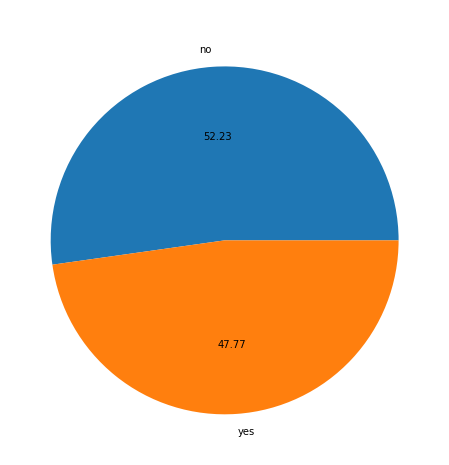

In [207]:
plt.figure(figsize = (8, 8))
plt.pie(df['deposit'].value_counts(), autopct = '%.2f', labels = ['no', 'yes'])
plt.title('Pie chart on Customer Deposit', color = 'white')
plt.show()

From the pie chart above, we can see that 52.23% of the customer in this dataset, did not deposit money to the bank while 47.77% of the customer deposited. From that, we can say that the target class in this dataset is balanced, thus no imbalanced functions needed to be used during the modelling process.

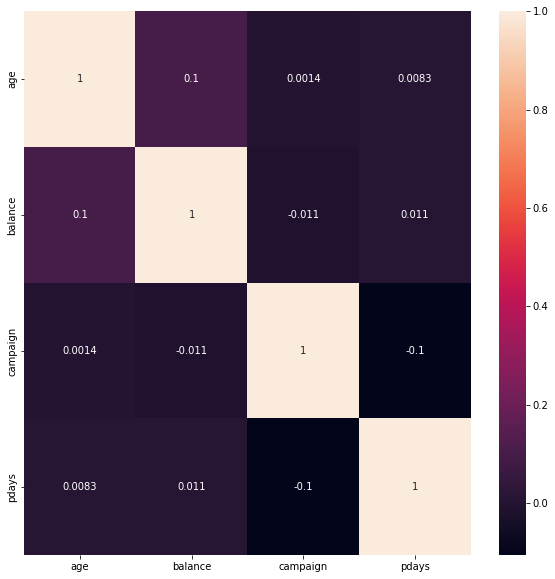

In [208]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.select_dtypes(exclude = 'object').corr(), annot = True)
plt.show()

From the correlation heatmap above, we can see that between all of the numerical features in this dataset, there is no numerical features that heavily correlated to each other

Next, we will do some data cleaning and preprocessing on the dataset

# Data Preprocessing

First, we will create a copy of the dataframe that we load the data into for the data cleaning, preprocessing and modelling

In [209]:
df_model = df.copy()

We will check if the data contains any duplicated row by using the duplicated() function

In [210]:
df_model.duplicated().sum()

8

From the duplicated function, it can be seen that there is 8 rows that have duplicated data. 

First, let us check the data that is duplicated

In [211]:
df_model[df_model.duplicated() == True]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,yes
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,no
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,no
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,no
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,no
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,no
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,yes


After this, we will drop any duplicated data present in the dataframe

In [212]:
df_model.drop_duplicates(inplace = True)
df_model.duplicated().sum()

0

As can be seen above as we drop the duplicates, we do not have any duplicated rows anymore.

Next, we will check for any missing value in the dataframe

In [213]:
df_model.isna().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

From series above, we can see that there is no missing value from the features in this dataset. But, we will try to explore each column's unique values to see whether the missing value is encoded not using the null value that is present in the numpy library or None class of python.

In [214]:
df_model[df_model == 'unknown'].count()
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].nunique(), df[col].unique()])

df_desc = pd.DataFrame(columns = ['Feature', 'Data Type', 'Number of Unique', 'Unique'], data = listItem)
df_desc

,Feature,Data Type,Number of Unique,Unique
0,age,int64,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,object,12,"[admin., self-employed, services, housemaid, t..."
2,balance,int64,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,object,2,"[no, yes]"
4,loan,object,2,"[no, yes]"
5,contact,object,3,"[cellular, telephone, unknown]"
6,month,object,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,int64,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,int64,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,object,4,"[unknown, other, failure, success]"


From the exploration of unique values from above it can be seen that in the poutcome and contact column there is a value that is called unknown, that can be seen as a missing value. 

Thus, we will try to see if there is how many missing value that is denoted as unknown.

In [215]:
df_model[df_model == 'unknown'].count()

age            0
job           54
balance        0
housing        0
loan           0
contact     1636
month          0
campaign       0
pdays          0
poutcome    5811
deposit        0
dtype: int64

As can be seen, there are some columns in this dataset that contains the unknown value, there is 
- 54 rows that have unknown value in the job column
- 1639 rows that have unknown value in the contact column
- 5819 columns that have unknown value in the poutcome column

However, since unknown value is not a nan or None value, it is still okay to leave it as unknown since it is still a unique value in the column itself. We also cannot drop any of the column with the missing value since in the job column it is really small, and in contact and poutcome, it can be a big factor on the fact of whehther the customer makes a deposit or not during the marketing campaign

# Outliers

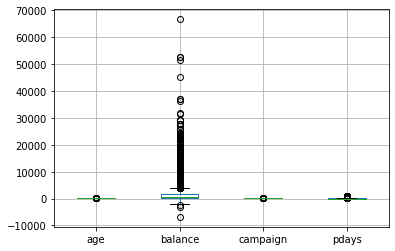

In [216]:
df_model.boxplot()

From the boxplot above, since balance had a huge range of data, we cannot see the boxplot of age, campaign, and pdays. Thus, we will separate the boxplot to each of the numerical features

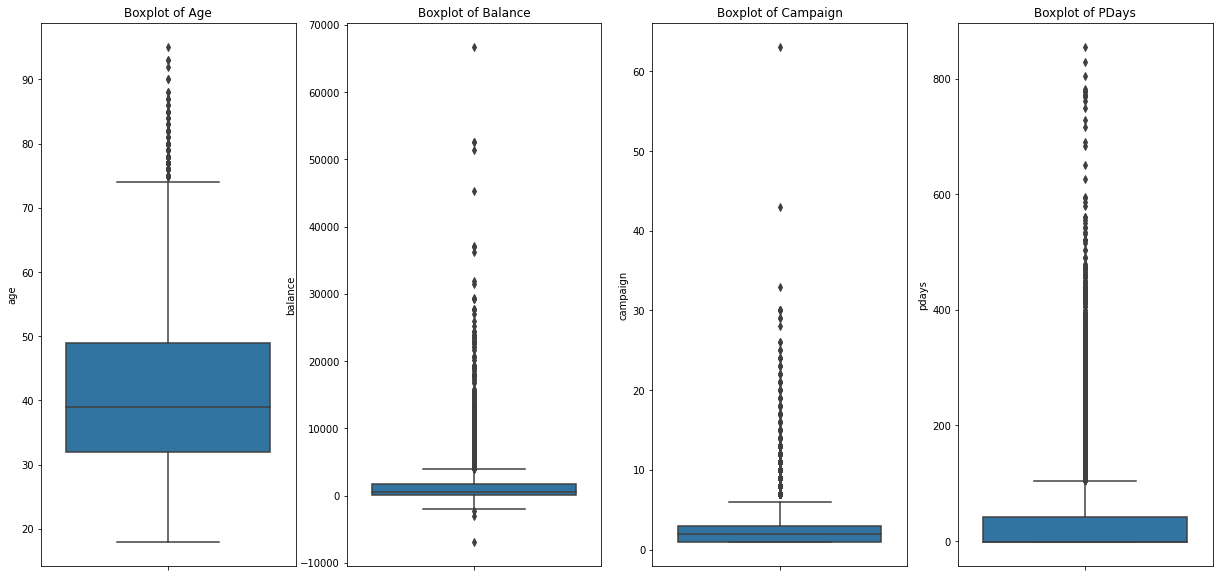

In [217]:
fig, axes = plt.subplots(1,4, figsize=(21, 10))
sns.boxplot(y = df_model['age'], ax=axes[0])
sns.boxplot(y = df_model['balance'], ax=axes[1])
sns.boxplot(y = df_model['campaign'], ax=axes[2])
sns.boxplot(y = df_model['pdays'], ax=axes[3])
axes[0].title.set_text('Boxplot of Age')
axes[1].title.set_text('Boxplot of Balance')
axes[2].title.set_text('Boxplot of Campaign')
axes[3].title.set_text('Boxplot of PDays')
plt.show()

To handle the outliers, we will drop the datas that exceeded the lower and upper fence, this way, we can eliminate any outliers present in the numerical data

In [218]:
listItem = []
iqr = 0

for col in df_num.columns:
    iqr = df_num[col].quantile(0.75) - df_num[col].quantile(0.25)
    listItem.append([iqr, df_num[col].quantile(0.25) - (1.5 * iqr), df_num[col].quantile(0.75) + (1.5 * iqr)])

df_num_qr = pd.DataFrame(columns = ['Interquartile', 'Lower', 'Upper'], data = listItem, index = df_num.columns)
df_num_qr

,Interquartile,Lower,Upper
age,17.0,6.5,74.5
balance,1557.0,-2208.5,4019.5
campaign,2.0,-2.0,6.0
pdays,41.0,-62.5,101.5


In [219]:
df_num = df.select_dtypes('number')
df_num.describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


For the preprocessing of this data, we will try to reduce the amount of outlier that each of the numerical feature of the dataset

## Age

First we will process age, we first use the describe function to see the summary of the column

In [220]:
df_num['age'].describe()

count    7813.000000
mean       41.257264
std        11.919710
min        18.000000
25%        32.000000
50%        39.000000
75%        49.000000
max        95.000000
Name: age, dtype: float64

It can be seen that the median of the age is 39 years old and it has a maximum amount of 95 years old. Next, we will see the interquartile and the upper and lower fence value to remove the outlier in age

In [221]:
df_num_qr.iloc[0]

Interquartile    17.0
Lower             6.5
Upper            74.5
Name: age, dtype: float64

As the lower fence has a value 6.5 while the minimum value for age is 18 years old, we don't need to remove lower values but, since the upper fence had a value of 74.5 and the data has a maximum of 74.5, we will remove any rows that contains the age of over 95

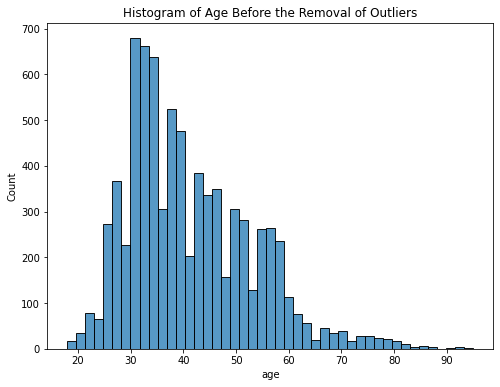

In [222]:
plt.figure(figsize = (8, 6))
sns.histplot(df_model['age'])
plt.title('Histogram of Age Before the Removal of Outliers')
plt.show()

In [223]:
df_model[df_model['age'] > 74.5]['deposit'].count()

121

In [224]:
df_model = df_model[df_model['age'] <= 74.5]

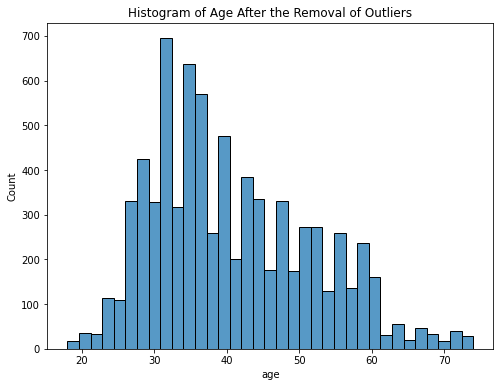

In [225]:
plt.figure(figsize = (8, 6))
sns.histplot(df_model['age'])
plt.title('Histogram of Age After the Removal of Outliers')
plt.show()

## Balance

In [226]:
df_num['balance'].describe()

count     7813.000000
mean      1512.448611
std       3089.291831
min      -6847.000000
25%        127.000000
50%        549.000000
75%       1684.000000
max      66653.000000
Name: balance, dtype: float64

It can be seen that the median of the balance is 549 and it has a maximum amount of 66653. Next, we will see the interquartile and the upper and lower fence value to remove the outlier in age:

In [227]:
df_num_qr.iloc[1]

Interquartile    1557.0
Lower           -2208.5
Upper            4019.5
Name: balance, dtype: float64

As the lower fence has a value -2208.5 while the minimum value for age is -6847 years old, we need to remove lower values and, since the upper fence had a value of 4019.5 and the data has a maximum of 66653, we will remove any rows that contains the age of over 4019.5.

But, we need to check the histogram to see whether the value of 4019.5 had a high count or not

Next, we will plot the histogram of balance to see how the distribution of value is

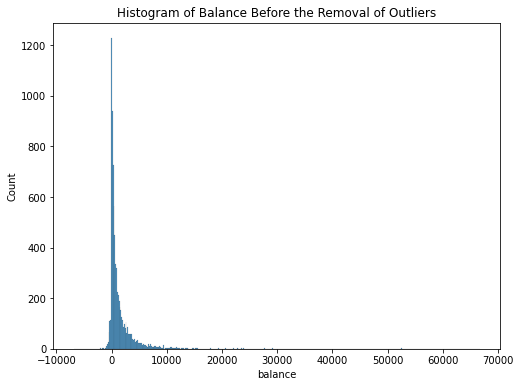

In [228]:
plt.figure(figsize = (8, 6))
sns.histplot(df_model['balance'])
plt.title('Histogram of Balance Before the Removal of Outliers')
plt.show()

It can be seen that, the histogram itself is highly right skewed. Although, the outlier is above 4019.5, the dataset still contains a quite large amount of data in the range of 4000 to 15000, thus the upper, but thel lower outlier is still followed with -2208.5

In [229]:
df_model[df_model['balance'] > 15000]['deposit'].count()

60

In [230]:
df_model[df_model['balance'] < -2208.5]['deposit'].count()

3

In [231]:
df_model = df_model[df_model['balance'] <= 15000]
df_model = df_model[df_model['balance'] >= -2208.5]

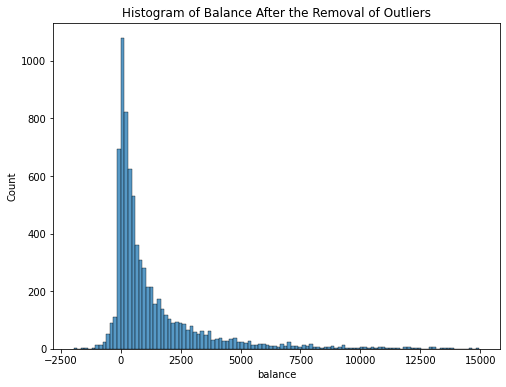

In [232]:
plt.figure(figsize = (8, 6))
sns.histplot(df_model['balance'])
plt.title('Histogram of Balance After the Removal of Outliers')
plt.show()

As can be seen above, although the histogram is still right-skewed, it is better, since the amount of people that have a balance between 4000 and 15000 is still quite large, it is better to not drop the one with balnce of of 4000 to 15000

## Campaign

In [233]:
df_num['campaign'].describe()

count    7813.000000
mean        2.519775
std         2.727001
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        63.000000
Name: campaign, dtype: float64

It can be seen that the median of the campaign is 2 and it has a maximum amount of 63. Next, we will see the interquartile and the upper and lower fence value to remove the outlier in campaign:

In [234]:
df_num_qr.iloc[2]

Interquartile    2.0
Lower           -2.0
Upper            6.0
Name: campaign, dtype: float64

As the lower fence has a value -2 while the minimum value for campaign is 1, we do not need to remove lower values and, since the upper fence had a value of 6 and the data has a maximum of 63, we will remove any rows that contains the age of over 6.

But, we need to check the histogram to see whether the value of higher than 6 had a high count or not

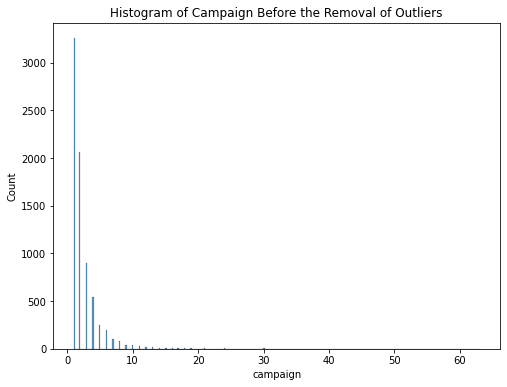

In [235]:
plt.figure(figsize = (8, 6))
sns.histplot(df_model['campaign'])
plt.title('Histogram of Campaign Before the Removal of Outliers')
plt.show()

It can be seen from the histogram above, campaign value of 6 to 10 still had a quite large amount of count, thus, we will drop campaign value of higher than 10

In [236]:
df_model[df_model['campaign'] > 10]['deposit'].count()

144

In [237]:
df_model = df_model[df_model['campaign'] <= 10]

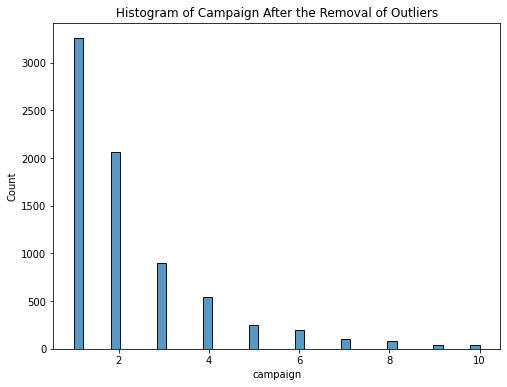

In [238]:
plt.figure(figsize = (8, 6))
sns.histplot(df_model['campaign'])
plt.title('Histogram of Campaign After the Removal of Outliers')
plt.show()

## pdays

In [239]:
df_num['pdays'].describe()

count    7813.000000
mean       51.408550
std       108.072739
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        40.000000
max       854.000000
Name: pdays, dtype: float64

It can be seen that the median of the pdays is -1 and it has a maximum amount of 854. Next, we will see the interquartile and the upper and lower fence value to remove the outlier in campaign:

In [240]:
df_num_qr.iloc[3]

Interquartile     41.0
Lower            -62.5
Upper            101.5
Name: pdays, dtype: float64

As the lower fence has a value -62.5 while the minimum value for campaign is -1, we do not need to remove lower values and, since the upper fence had a value of 101.5 and the data has a maximum of 854, we will remove any rows that contains the pdays of over 101.5.

But, we need to check the histogram to see whether the value of higher than 101.5 had a high count or not

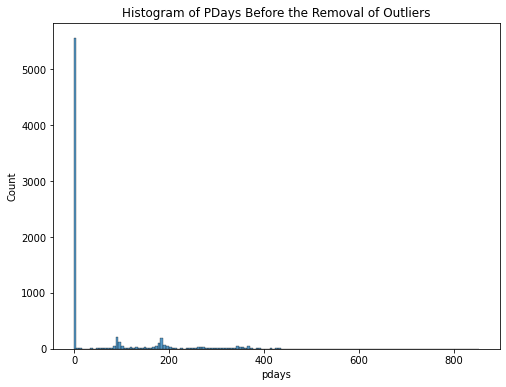

In [241]:
plt.figure(figsize = (8, 6))
sns.histplot(df_model['pdays'])
plt.title('Histogram of PDays Before the Removal of Outliers')
plt.show()

From above histogram we can see thre is tow spikes in the count between the 0 to 200 pdays, so, since the count of the value of above 101.5 but below 200 had that spike it is better to remove the data with pdays of over 200 

In [242]:
df_model[df_model['pdays'] > 200]['deposit'].count()

704

In [243]:
df_model = df_model[df_model['pdays'] <= 200]

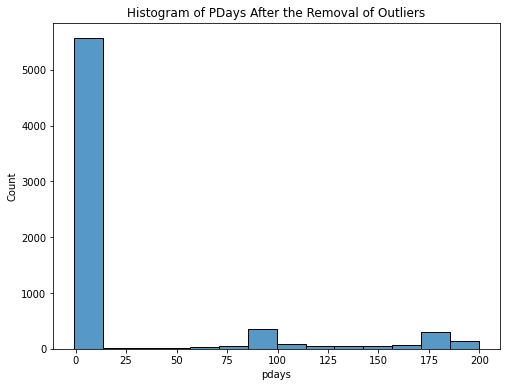

In [244]:
plt.figure(figsize = (8, 6))
sns.histplot(df_model['pdays'])
plt.title('Histogram of PDays After the Removal of Outliers')
plt.show()

# Cleaned Dataset

In [245]:
df_model.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
5,41,admin.,-76,yes,no,cellular,apr,1,-1,unknown,no
6,37,admin.,4803,no,no,cellular,jan,2,-1,unknown,yes


In [246]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6773 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       6773 non-null   int64 
 1   job       6773 non-null   object
 2   balance   6773 non-null   int64 
 3   housing   6773 non-null   object
 4   loan      6773 non-null   object
 5   contact   6773 non-null   object
 6   month     6773 non-null   object
 7   campaign  6773 non-null   int64 
 8   pdays     6773 non-null   int64 
 9   poutcome  6773 non-null   object
 10  deposit   6773 non-null   object
dtypes: int64(4), object(7)
memory usage: 635.0+ KB


After the removal of all the outliers, it can be seen that the new dataframe had 6773 rows, thus, 1140 rows are removed from the outlier removal by checking the interquartile method

# Modellling

Next, we will go to the modelling step, first we will import all the necessary libraries and functions to create model, pipeline, encoding and evaluate the resulting model

In [247]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [248]:
# Model Selection Libraries
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, StratifiedKFold, KFold

# Encoding Libraries
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Scaler Library
from sklearn.preprocessing import StandardScaler

# Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost.sklearn import XGBClassifier

# Metric Libraries
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, roc_auc_score

## Encoding the Categorical Variables

In order to use the categorical variables for modelling, we must first encode the categorical variables so that, it transformed into numerical variables, we will use one hot encoding for the Agency type, Contact and Distribution Channel and Binary Encoder for the Agency, Product Name, Destination. We will then use ColumnTransformer so that it can be applied to the model pipeline.

In [249]:
listItem = []

for col in df.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].nunique(), df_model[col].unique()])

df_desc = pd.DataFrame(columns = ['Feature', 'Data Type', 'Number of Unique', 'Unique'], data = listItem)
df_desc

,Feature,Data Type,Number of Unique,Unique
0,age,int64,57,"[55, 38, 36, 41, 37, 35, 57, 23, 33, 31, 53, 3..."
1,job,object,12,"[admin., services, housemaid, technician, mana..."
2,balance,int64,2899,"[1662, -87, 205, -76, 4803, 911, 805, 0, 1234,..."
3,housing,object,2,"[no, yes]"
4,loan,object,2,"[no, yes]"
5,contact,object,3,"[cellular, telephone, unknown]"
6,month,object,12,"[jun, may, nov, apr, jan, sep, feb, mar, aug, ..."
7,campaign,int64,10,"[2, 1, 4, 5, 3, 6, 7, 8, 9, 10]"
8,pdays,int64,171,"[-1, 21, 91, 186, 96, 89, 114, 93, 175, 57, 15..."
9,poutcome,object,4,"[unknown, failure, success, other]"


In [250]:
transformer1 = ColumnTransformer([
    ('one hot', OneHotEncoder(), ['housing', 'loan', 'poutcome', 'contact']),
    ('binary', ce.BinaryEncoder(), ['job', 'month'])
], remainder = 'passthrough')

## Data Splitting

Next, we will split the data to the feature and target, with x being the features and y being the target, we will also split the data into train and test data with 70:30 distribution. 

In order to have the same proportions of sample in each of the train and test data we will stratify the data based on the y class

In [251]:
x = df_model.drop(['deposit'], axis = 1)
y = df_model['deposit']

In [252]:
y2 = np.where(df_model['deposit'] == 'yes', 1, 0)

In [253]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y2,
    stratify = y2,
    test_size = 0.3,
    random_state = 1
)

## Preliminary Cross Validation

In this cross validation, to prevent information leakage, the encoding and scaling and modelling is pipelined. 

This data needed to be scaled, since as can be seen from the boxplot above, the value of balance is much higher, thus, if it is not scaled, the resulting model will be biased towards the balance.

In [257]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state = 1)
bg = BaggingClassifier(random_state = 1)
xgb = XGBClassifier(random_state = 1)

scaler = StandardScaler()

models = [lr, knn, tree, rf, bg, xgb]

j = 0

model_cv_roc_mean = []
model_cv_roc_std = []
model_cv_roc_val = []

for i in models:
    skfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

    pipeline = Pipeline([
        ('encoding', transformer1),
        ('scaler', scaler),
        ('model', i)
    ])

    model_cv_roc = cross_val_score(
        pipeline,
        x_train,
        y_train,
        cv = skfold,
        scoring = 'roc_auc'
    )

    model_cv_roc_mean.append(model_cv_roc.mean())
    model_cv_roc_std.append(model_cv_roc.std())

    print(i, model_cv_roc, model_cv_roc.mean(), model_cv_roc.std())
  
  

LogisticRegression() [0.747951   0.72516972 0.72972768 0.76035268 0.78034375] 0.7487089650387316 0.020254854635693764
KNeighborsClassifier() [0.7155657  0.71140276 0.70022991 0.73069643 0.74602232] 0.7207834246503666 0.01595580131251749
DecisionTreeClassifier() [0.61900891 0.61607625 0.60009598 0.62908036 0.59999107] 0.6128505139793587 0.011311784612851865
RandomForestClassifier(random_state=1) [0.74454343 0.73053903 0.73634152 0.77638393 0.75950223] 0.749462027495175 0.01661333628568486
BaggingClassifier(random_state=1) [0.72830067 0.70951926 0.68481473 0.73558259 0.73354687] 0.7183528251639295 0.019128612272260995
XGBClassifier(random_state=1) [0.76288196 0.75294464 0.76417188 0.78322098 0.7885692 ] 0.7703577311100884 0.013375263264696312


From the cross validation score above based on the ROC-AUC Score, the highest mean score is the XG Boosting Classifier with 0.77. While the worst mean score model is the decision tree classifier with 0.611. Then, regarding the standard deviation score of the ROC-AUC score, the XGBClassifier had the lowest standard deviation with 0.013, thus the most stable of the models.

Next we will try to test the model by using the three models with the 3 highest mean scores to predict the test data , which is XGBClassifier, Logistic Regression and the Random Forest Classifier.

## Test Data Prediction

In [258]:
models = {
    'XG Boosting' : XGBClassifier(random_state = 1),
    'Random Forest' : RandomForestClassifier(random_state = 1),
    'Logistic Regression' : LogisticRegression()
}

for i in models:

    pipeline_test = Pipeline([
        ('preprocess', transformer1),
        ('scaler', scaler),
        ('model', models[i])
    ])

    pipeline_test.fit(x_train, y_train)
    y_pred_before = pipeline_test.predict(x_test)
    print('\n')
    print(i)
    print(classification_report(y_test, y_pred_before))
    print(roc_auc_score(y_test, y_pred_before))



XG Boosting
              precision    recall  f1-score   support

           0       0.69      0.78      0.73      1071
           1       0.71      0.60      0.65       961

    accuracy                           0.70      2032
   macro avg       0.70      0.69      0.69      2032
weighted avg       0.70      0.70      0.69      2032

0.6911247329316743


Random Forest
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      1071
           1       0.70      0.62      0.66       961

    accuracy                           0.69      2032
   macro avg       0.70      0.69      0.69      2032
weighted avg       0.70      0.69      0.69      2032

0.6912597852182842


Logistic Regression
              precision    recall  f1-score   support

           0       0.68      0.79      0.73      1071
           1       0.72      0.59      0.65       961

    accuracy                           0.70      2032
   macro avg       0.70      0.69     

As can be seen from the above evaluation metrics result above, the highest ROC-AUC value is the Gradient Boosting model, Regarding the overall performance score, all of the model had a similar score in that regard, so the decision is still to use the XGBClassifier Model. Also, with random forest eventhough it had a slightly higher score in ROC-AUC, it had a slightly worse accuracy result, thus, it is better to use the XGBClassifier.

Next, we will try to do some Hyperparamter Tuning using Random Search

## Hyperparameter Tuning using Random Search

In [187]:
max_depth = list(np.arange(1, 11))

learning_rate = list(np.arange(1, 100)/100)

n_estimators = list(np.arange(100, 201))

subsample = list(np.arange(2, 10)/10)

gamma = list(np.arange(1, 11))

colsample_bytree = list(np.arange(1, 10)/10)

reg_alpha = list(np.logspace(-3, 1, 10)) 

hyperparam_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__alpha': reg_alpha
}

In [188]:
from sklearn.model_selection import GridSearchCV


xgb = XGBClassifier(random_state = 1, verbose = 0)

xgb_pipeline = Pipeline([
        ('preprocess', transformer1),
        ('scaler', scaler),
        ('model', xgb)
    ])

skfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

random_xgb = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions = hyperparam_xgb,
    cv = skfold,
    scoring = ['roc_auc', 'accuracy'],
    n_jobs = 2,
    refit = 'roc_auc',
    n_iter = 100,
    random_state = 42
)

In [189]:
random_xgb.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one '
                                                                               'hot',
                                                                               OneHotEncoder(),
                                                                               ['housing',
                                                                                'loan',
                                                                                'poutcome',
                                                                                'contact']),
                                                                              ('binary',
                                                 

In [190]:
random_xgb.best_score_

0.7770092693599895

In [191]:
random_xgb.best_params_

{'model__subsample': 0.9,
 'model__n_estimators': 161,
 'model__max_depth': 5,
 'model__learning_rate': 0.2,
 'model__gamma': 7,
 'model__colsample_bytree': 0.5,
 'model__alpha': 0.1668100537200059}

## Tuned Model Test Data Prediction

Next, we will try to fit the training data with the hyperparameter tuned model, and then test it using the test data for prediction

In [192]:
tuned_gb = random_xgb.best_estimator_

tuned_gb.fit(x_train, y_train)

y_pred_tuned = tuned_gb.predict(x_test)

## Tuning Test Comparison

Then, we will compare the performance of the XGB before and After Tuning

In [193]:
xgb = XGBClassifier(random_state = 1, verbose = 0)

xgb_pipeline = Pipeline([
        ('preprocess', transformer1),
        ('scaler', scaler),
        ('model', gb)
    ])

xgb_pipeline.fit(x_train, y_train)

y_pred_before = xgb_pipeline.predict(x_test)

In [194]:
print('Before Tuning\n')
print(classification_report(y_test, y_pred_before))
print('ROC-AUC Score: ', roc_auc_score(y_test, y_pred_before), '\n')
print('After Tuning\n')
print(classification_report(y_test, y_pred_tuned))
print('ROC-AUC Score: ', roc_auc_score(y_test, y_pred_tuned))

Before Tuning

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      1071
           1       0.71      0.60      0.65       961

    accuracy                           0.70      2032
   macro avg       0.70      0.69      0.69      2032
weighted avg       0.70      0.70      0.69      2032

ROC-AUC Score:  0.6920584397477341 

After Tuning

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      1071
           1       0.74      0.62      0.67       961

    accuracy                           0.71      2032
   macro avg       0.72      0.71      0.71      2032
weighted avg       0.72      0.71      0.71      2032

ROC-AUC Score:  0.7090395644903816


From what we can above, the score of both the classification report and the ROC-AUC score is higher in the after tuning model. Thus we will use the after tuning model

Next, we will plot the various evaluation metrics

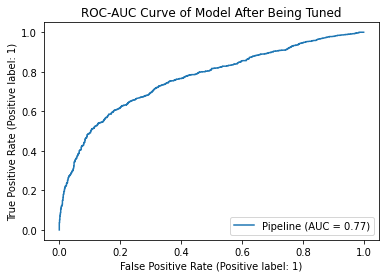

In [195]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, PrecisionRecallDisplay

plt.Figure(figsize = (10, 10))
RocCurveDisplay.from_estimator(tuned_gb, x_test, y_test)
plt.title('ROC-AUC Curve of Model After Being Tuned')
plt.show()

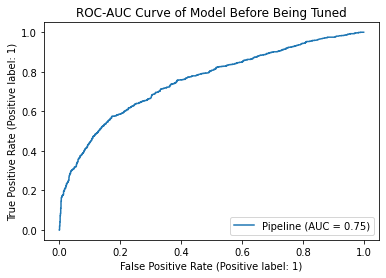

In [196]:
plt.Figure(figsize = (10, 10))
RocCurveDisplay.from_estimator(xgb_pipeline, x_test, y_test)
plt.title('ROC-AUC Curve of Model Before Being Tuned')
plt.show()

As can be seen from the ROC-AUC Curve above, while both of them is better than the no-skill model, the difference in curve of both after and before tuning can not be seen at all thus, we will try using the confusion matrix to better see the performace of the model

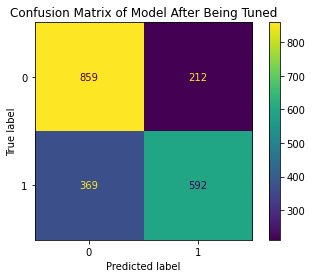

In [261]:
plt.Figure(figsize = (10, 10))
ConfusionMatrixDisplay.from_estimator(tuned_gb, x_test, y_test)
plt.title('Confusion Matrix of Model After Being Tuned')
plt.show()

<Figure size 720x720 with 0 Axes>

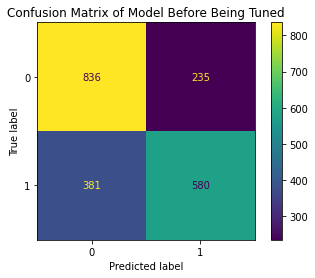

In [198]:
plt.figure(figsize = (10, 10))
ConfusionMatrixDisplay.from_estimator(xgb_pipeline, x_test, y_test)
plt.title('Confusion Matrix of Model Before Being Tuned')
plt.show()

As can be seen from the confusion matrix above, the rate that the model predict correctly is higher in the tuned model, with a decrease of 23 in the false positive label, and decrease of 12 in the false negative label. 

The model was able to predict 1451 data correctly, with 859 true negative and 592 true positive after being tuned

So, as can be seen from both the confusion matrix and the ROC-AUC score and graph and accuracy, the model perform slightly better after the hyperparamter is tuned.

### Feature Importance

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


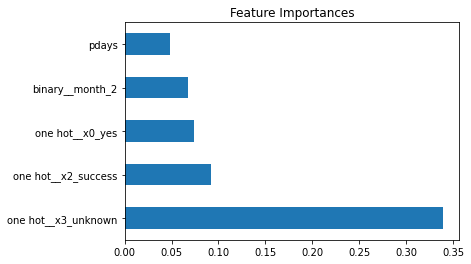

In [199]:
feature_imp = pd.Series(tuned_gb['model'].feature_importances_, transformer1.get_feature_names()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

From the feature importance bar plot above, the five most important feature in this model is the pdays or how long since the customer was last contacted, the outcome of the previous marketing campaign, how the customer is contacted, whether the customer had a housing or not, and at what month the customer was contacted

# Conclusion

From the modelling we can see that the pdays or how long since the customer was last contacted, the outcome of the previous marketing campaign, how the customer is contacted, whether the customer had a housing or not, and at what month the customer was contacted are the most influental on whether the customer will deposit during the marketing campaign according to the model created.

From the evaluation metrics, ROC-AUC score and the Classification Report which contains the accuracy, precision, recall and the f1-score, the performance of the model after the hyperparameter tuning increases. Although, the increases itself is not significant amount, it still had a better overall performance compared to before it was tuned.

This performance however can worsen, due to this model having both less feature and observations from which the model could be trained on, especially on several aspects of the customer's data is missing and also there is few factor on the economic information of the customer. This performance will be worse especially, if the data given is filled with outliers, since this model is trained using data that has been mostly cleaned from outliers. 

There are many things on which the model can be improved upon such as, better hyperparameter tuning and having more feature and observations to train the model upon and also having several unknown value. I believe that this dataset is missing several features that can improve the prediction of the model.

# Recommendation

1. If possible, for the next marketing campaign data, add a lot more samples to the dataset so that, the model can be trained using more samples and thus, both the prediction and analysis can be better.

2. Add more features regarding the customer data, such as the level of education and marital status, those two data can be important features to the prediction. 

  Also, if possible, add more data regarding the economic side of the customer such as, the income of the customer and possibly, the amount of time the customer had been using the bank.

4. Regarding the data, if possible, reduce the amount of unknowns of the previous marketing campaign data, since previous marketing campaign data could be important in both predicting and analyzing the customers depositing or not.

5. We can measure how satisfied the customer with the bank possibly by asking for the satisfaction of the customer during customer contact. Then, we can use the result as features.

6. To check the real world result from the prediction, it is recommended to continue training and testing by using the data gained from the next marketing campaign, by comparing the test result with the real result, we can constantly train the model with newer data and continue on improving upon the model itself.

# Saving the Model

In [260]:
import pickle

tuned_gb.fit(x_train, y_train)

pickle.dump(tuned_gb, open('Model_Marketing_XGB_Tuned.sav', 'wb'))

In [263]:
loaded_model = pickle.load(open('Model_Marketing_XGB_Tuned.sav', 'rb'))

In [264]:
roc_auc_score(y_test, loaded_model.predict(x_test))

0.7090395644903816